In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_classification
from sklearn.datasets import make_blobs
from sklearn.datasets import make_gaussian_quantiles
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from mlxtend.evaluate import bias_variance_decomp

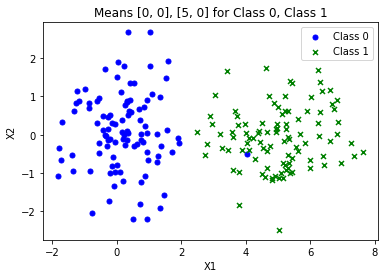

[[ 2.44575147 -0.00442307]]

confusion matrix: 
[[31  1]
 [ 0 35]]

classification report:
              precision    recall  f1-score   support

         0.0       1.00      0.97      0.98        32
         1.0       0.97      1.00      0.99        35

    accuracy                           0.99        67
   macro avg       0.99      0.98      0.99        67
weighted avg       0.99      0.99      0.99        67



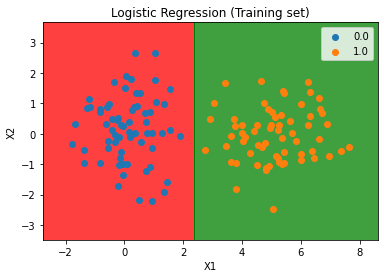

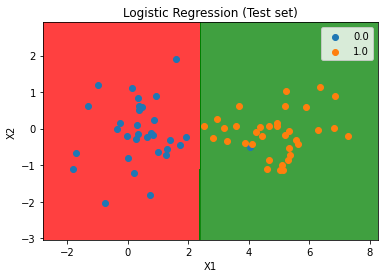

In [2]:
X = np.empty([200,3])
mean_1 = [0,0]
cov = [[1,0],[0,1]]
X[:100, :2] = np.random.default_rng().multivariate_normal(mean_1, cov, 100)
X[:100, 2] = int(0)

mean_2 = [5,0]
cov = [[1,0],[0,1]]
X[100:, :2] = np.random.default_rng().multivariate_normal(mean_2, cov, 100)
X[100:, 2] = int(1)

plt.scatter(X[:100, 0], X[:100, 1], marker='o', c='b',
            s=25, label='Class 0')
plt.scatter(X[100:, 0], X[100:, 1], marker='x', c='g',
            s=25, label='Class 1')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()
plt.title("Means {}, {} for Class 0, Class 1" .format(mean_1, mean_2))
plt.show()

X_train, X_test, Y_train, Y_test = train_test_split(X[:, :-1], X[:, -1], test_size=1/3)
# print(X_train, Y_train)
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, Y_train)
print(classifier.coef_)
print()
Y_pred = classifier.predict(X_test)

cm = confusion_matrix(Y_test, Y_pred)
print('confusion matrix: ')
print(cm)

print()
print("classification report:")
print(classification_report(Y_test, Y_pred))

# Visualising the Training set results for 1st data set
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, Y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()
plt.show()

# Visualising the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, Y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()
plt.show()

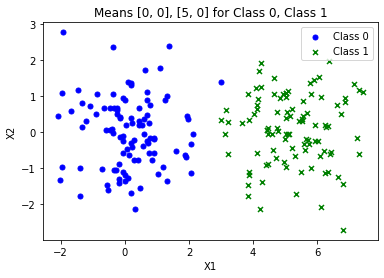

[[ 2.4005546  -0.18074789]]

confusion matrix: 
[[34  0]
 [ 0 33]]
classification report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        34
         1.0       1.00      1.00      1.00        33

    accuracy                           1.00        67
   macro avg       1.00      1.00      1.00        67
weighted avg       1.00      1.00      1.00        67



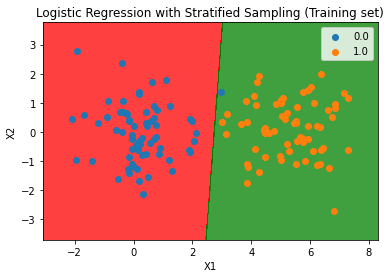

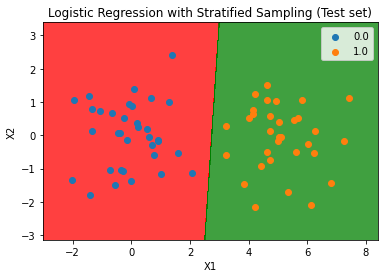

In [3]:
X = np.empty([200,3])
mean_1 = [0,0]
cov = [[1,0],[0,1]]
X[:100, :2] = np.random.default_rng().multivariate_normal(mean_1, cov, 100)
X[:100, 2] = int(0)

mean_2 = [5,0]
cov = [[1,0],[0,1]]
X[100:, :2] = np.random.default_rng().multivariate_normal(mean_2, cov, 100)
X[100:, 2] = int(1)

plt.scatter(X[:100, 0], X[:100, 1], marker='o', c='b',
            s=25, label='Class 0')
plt.scatter(X[100:, 0], X[100:, 1], marker='x', c='g',
            s=25, label='Class 1')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()
plt.title("Means {}, {} for Class 0, Class 1" .format(mean_1, mean_2))
plt.show()

X_train, X_test, Y_train, Y_test = train_test_split(X[:, :-1], X[:, -1], test_size=1/3, stratify=X[:, -1])
# print(X_train, Y_train)
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, Y_train)
print(classifier.coef_)
print()
Y_pred = classifier.predict(X_test)

cm = confusion_matrix(Y_test, Y_pred)
print('confusion matrix: ')
print(cm)

print("classification report:")
print(classification_report(Y_test, Y_pred))

# Visualising the Training set results for 1st data set
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, Y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], label = j)
plt.title('Logistic Regression with Stratified Sampling (Training set)')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()
plt.show()

# Visualising the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, Y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], label = j)
plt.title('Logistic Regression with Stratified Sampling (Test set)')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()
plt.show()

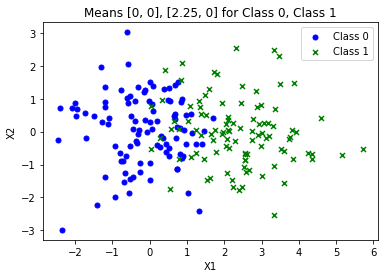


confusion matrix: 
[[32  4]
 [ 4 27]]
classification report:
              precision    recall  f1-score   support

         0.0       0.89      0.89      0.89        36
         1.0       0.87      0.87      0.87        31

    accuracy                           0.88        67
   macro avg       0.88      0.88      0.88        67
weighted avg       0.88      0.88      0.88        67



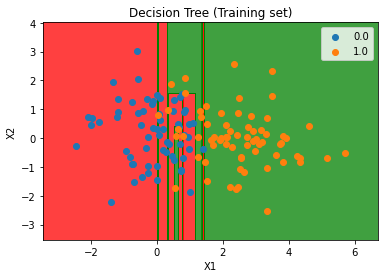

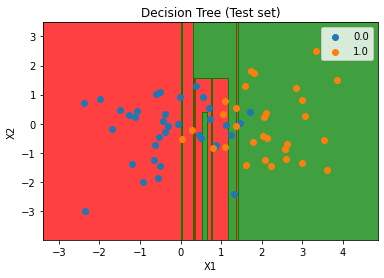

Average expected loss: 0.160
Average bias: 0.149
Average variance: 0.050


In [4]:
X = np.empty([200,3])
mean_1 = [0,0]
cov = [[1,0],[0,1]]
X[:100, :2] = np.random.default_rng().multivariate_normal(mean_1, cov, 100)
X[:100, 2] = int(0)

mean_2 = [2.25,0]
cov = [[1,0],[0,1]]
X[100:, :2] = np.random.default_rng().multivariate_normal(mean_2, cov, 100)
X[100:, 2] = int(1)

plt.scatter(X[:100, 0], X[:100, 1], marker='o', c='b',
            s=25, label='Class 0')
plt.scatter(X[100:, 0], X[100:, 1], marker='x', c='g',
            s=25, label='Class 1')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()
plt.title("Means {}, {} for Class 0, Class 1" .format(mean_1, mean_2))
plt.show()

X_train, X_test, Y_train, Y_test = train_test_split(X[:, :-1], X[:, -1], test_size=1/3)
# print(X_train, Y_train)
classifier = DecisionTreeClassifier(random_state=0)
classifier.fit(X_train, Y_train)
print()
Y_pred = classifier.predict(X_test)

cm = confusion_matrix(Y_test, Y_pred)
print('confusion matrix: ')
print(cm)

print("classification report:")
print(classification_report(Y_test, Y_pred))

# Visualising the Training set results for 1st data set
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, Y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], label = j)
plt.title('Decision Tree (Training set)')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()
plt.show()

# Visualising the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, Y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], label = j)
plt.title('Decision Tree (Test set)')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()
plt.show()

avg_expected_loss, avg_bias, avg_var = bias_variance_decomp(
        classifier, X_train, Y_train, X_test, Y_test, 
        loss='0-1_loss',
        random_seed=123)

print('Average expected loss: %.3f' % avg_expected_loss)
print('Average bias: %.3f' % avg_bias)
print('Average variance: %.3f' % avg_var)

confusion matrix: 
[[32  4]
 [ 6 25]]
classification report:
              precision    recall  f1-score   support

         0.0       0.84      0.89      0.86        36
         1.0       0.86      0.81      0.83        31

    accuracy                           0.85        67
   macro avg       0.85      0.85      0.85        67
weighted avg       0.85      0.85      0.85        67



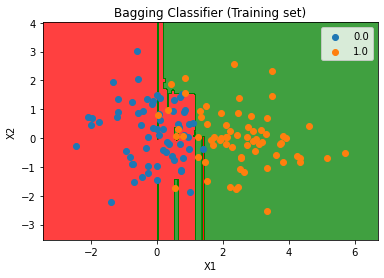

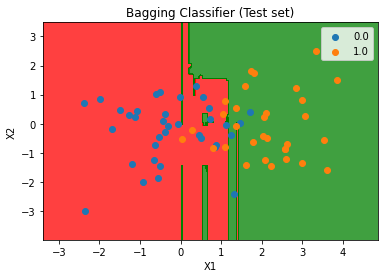

Average expected loss: 0.161
Average bias: 0.149
Average variance: 0.030


In [5]:
classifier = BaggingClassifier(random_state=0, n_estimators = 100)
classifier.fit(X_train, Y_train)

Y_pred = classifier.predict(X_test)

cm = confusion_matrix(Y_test, Y_pred)
print('confusion matrix: ')
print(cm)

print("classification report:")
print(classification_report(Y_test, Y_pred))

# Visualising the Training set results for 1st data set
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, Y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], label = j)
plt.title('Bagging Classifier (Training set)')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()
plt.show()

# Visualising the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, Y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], label = j)
plt.title('Bagging Classifier (Test set)')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()
plt.show()

avg_expected_loss, avg_bias, avg_var = bias_variance_decomp(
        classifier, X_train, Y_train, X_test, Y_test, 
        loss='0-1_loss',
        random_seed=123)

print('Average expected loss: %.3f' % avg_expected_loss)
print('Average bias: %.3f' % avg_bias)
print('Average variance: %.3f' % avg_var)